In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split , RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,precision_recall_fscore_support,mean_absolute_error,mean_squared_error, confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link: https://www.kaggle.com/datasets/anandaramg/luxury-loan-portfolio

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
raw_data =pd.read_csv('/content/drive/MyDrive/Ml Assignment-1/LuxuryLoanPortfolio.csv')

## Describe Dataset

In [ ]:
raw_data.head()

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
3,LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
4,LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


In [ ]:
raw_data.shape

(1678, 32)

In [ ]:
raw_data.nunique()

loan_id                             1678
funded_amount                        507
funded_date                         1256
duration years                         4
duration months                        4
10 yr treasury index date funded     338
interest rate percent                661
interest rate                        662
payments                            1661
total past payments                   97
loan balance                        1675
property value                      1635
purpose                                5
firstname                            952
middlename                           777
lastname                            1034
social                              1678
phone                               1678
title                                870
employment length                     18
BUILDING CLASS CATEGORY               24
TAX CLASS AT PRESENT                   8
BUILDING CLASS AT PRESENT             46
ADDRESS 1                           1309
ADDRESS 2       

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_id                           1678 non-null   object 
 1   funded_amount                     1678 non-null   float64
 2   funded_date                       1678 non-null   object 
 3   duration years                    1678 non-null   int64  
 4   duration months                   1678 non-null   int64  
 5   10 yr treasury index date funded  1678 non-null   float64
 6   interest rate percent             1678 non-null   float64
 7   interest rate                     1678 non-null   float64
 8   payments                          1678 non-null   float64
 9   total past payments               1678 non-null   int64  
 10  loan balance                      1678 non-null   float64
 11  property value                    1678 non-null   float64
 12  purpos

## Data Augmentation

In [ ]:
aug_ds = raw_data.map(lambda x, y: (data_augmentation(x, training=True), y))

AttributeError: ignored

## Data Cleaning

In [ ]:
# in the above list we can see that there are many features which has more number of unique values 
# for example features 'social' and 'phone' all the rows has unique values in it 
# these feratures will not be usefull for the machine to learn a concept 
# so we will delete these following feature
# [firstname, middlename, lastname]
# loan_id, phone, social 
# duration years and duration months are the same so we can get rid of one of them
# interest rate
# As there are just high-status titles we can drop that too
# Addresses too as we will leave the zip code


raw_data = raw_data.drop(['firstname', 'middlename', 'lastname', 'loan_id', 'phone', 'social', 'duration months', 'interest rate percent', 'title', 'ADDRESS 1', 'ADDRESS 2','CITY','STATE'], axis = 1)

In [ ]:
Le = LabelEncoder()
raw_data['BUILDING CLASS AT PRESENT'] = Le.fit_transform(raw_data['BUILDING CLASS AT PRESENT'])
raw_data['BUILDING CLASS CATEGORY'] = Le.fit_transform(raw_data['BUILDING CLASS CATEGORY'])
raw_data['purpose'] = Le.fit_transform(raw_data['purpose'])
raw_data['TAX CLASS AT PRESENT'] = Le.fit_transform(raw_data['TAX CLASS AT PRESENT'])


In [ ]:
#We can see that in these column is a '-'value so my guess is that we can replace this with '0'
raw_data['LAND SQUARE FEET'] = raw_data['LAND SQUARE FEET'].replace(' -  ', '0')
raw_data['GROSS SQUARE FEET'] = raw_data['GROSS SQUARE FEET'].replace(' -  ', '0')

In [ ]:
#Transforming these columns in numeric data type
raw_data['LAND SQUARE FEET'] = pd.to_numeric(raw_data['LAND SQUARE FEET'])
raw_data['GROSS SQUARE FEET'] = pd.to_numeric(raw_data['GROSS SQUARE FEET'])

In [ ]:
#A little feature engineering on the funded_date as it is quite important
raw_data['funded_date'] = pd.to_datetime(raw_data['funded_date'], format='%Y-%m-%d')
raw_data['funded_year'] = raw_data['funded_date'].dt.year
raw_data['funded_month'] = raw_data['funded_date'].dt.month
raw_data = raw_data.drop(['funded_date'], axis=1)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1678 non-null   float64
 1   duration years                    1678 non-null   int64  
 2   10 yr treasury index date funded  1678 non-null   float64
 3   interest rate                     1678 non-null   float64
 4   payments                          1678 non-null   float64
 5   total past payments               1678 non-null   int64  
 6   loan balance                      1678 non-null   float64
 7   property value                    1678 non-null   float64
 8   purpose                           1678 non-null   int64  
 9   employment length                 1678 non-null   int64  
 10  BUILDING CLASS CATEGORY           1678 non-null   int64  
 11  TAX CLASS AT PRESENT              1678 non-null   int64  
 12  BUILDI

## Corelation of DATASET

In [ ]:
raw_data.corr()["TAX CLASS AT TIME OF SALE"]

funded_amount                       0.101161
duration years                     -0.014234
10 yr treasury index date funded    0.001212
interest rate                      -0.003293
payments                            0.096184
total past payments                 0.033705
loan balance                        0.094952
property value                      0.102668
purpose                             0.020354
employment length                   0.011260
BUILDING CLASS CATEGORY             0.816963
TAX CLASS AT PRESENT                0.757746
BUILDING CLASS AT PRESENT           0.180779
ZIP CODE                           -0.007447
TOTAL UNITS                         0.059134
LAND SQUARE FEET                    0.084873
GROSS SQUARE FEET                   0.043444
TAX CLASS AT TIME OF SALE           1.000000
funded_year                        -0.027520
funded_month                       -0.051805
Name: TAX CLASS AT TIME OF SALE, dtype: float64

In [ ]:
# we delete all the columns that has less correaltion 
raw_data = raw_data.drop(["duration years","10 yr treasury index date funded","interest rate","total past payments","purpose","employment length","ZIP CODE","TOTAL UNITS","GROSS SQUARE FEET","funded_year","funded_month", "LAND SQUARE FEET"],axis=1)

In [ ]:
# now we have only those columns that has more correlation 
# we use only these columns for the training 
raw_data.corr()["TAX CLASS AT TIME OF SALE"]

funded_amount                0.101161
payments                     0.096184
loan balance                 0.094952
property value               0.102668
BUILDING CLASS CATEGORY      0.816963
TAX CLASS AT PRESENT         0.757746
BUILDING CLASS AT PRESENT    0.180779
TAX CLASS AT TIME OF SALE    1.000000
Name: TAX CLASS AT TIME OF SALE, dtype: float64

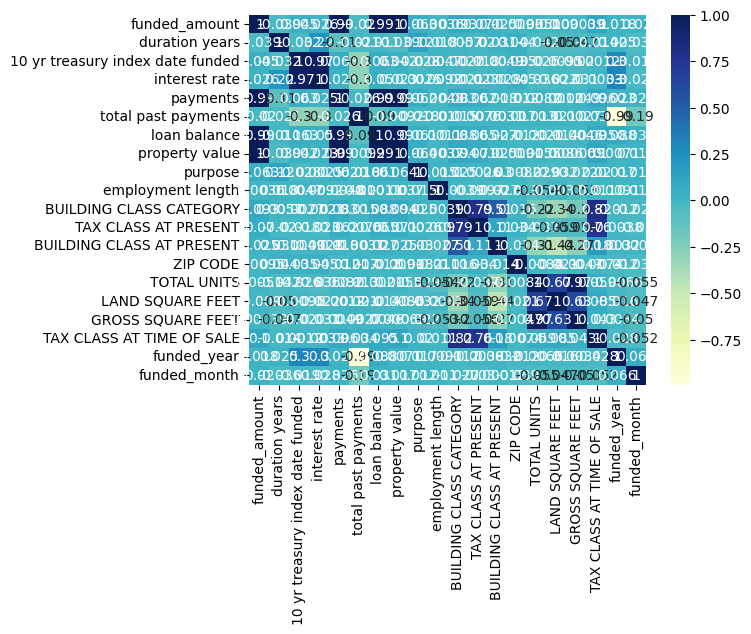

In [ ]:
dataplot = sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
raw_data.head()

,funded_amount,duration years,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,funded_year,funded_month
0,790000.0,20,1.96,0.03359,4524.65,92,373732.18,930250.0,0,6,11,6,23,10001,1,0,0,2,2012,4
1,1720000.0,15,2.21,0.03508,12302.74,62,957230.24,1995250.0,0,10,3,1,25,10104,1,0,0,1,2014,10
2,3720000.0,15,2.60,0.03896,27322.92,66,1916687.35,3881700.0,0,1,3,1,25,10029,1,0,0,1,2014,6
3,1079000.0,20,1.99,0.03389,6196.40,94,496538.75,1402450.0,0,17,11,6,23,10010,1,0,0,2,2012,2
4,2028000.0,20,1.79,0.03188,11439.05,45,1513242.57,2216500.0,0,5,23,7,38,10172,1,0,0,4,2016,4


In [ ]:
#Defining the attributes and labels
data_X = raw_data.drop(['TAX CLASS AT TIME OF SALE'], axis=1)
data_Y = raw_data['TAX CLASS AT TIME OF SALE']

In [ ]:
#Spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.15 , random_state=42)

## Standard Scaling

In [ ]:
# Perform feature scaling and normalization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
validation_set = x_test[1:20]
validation_set[0][2] = 0.001254
validation_set[2][3] = 1.3125
validation_set[1][0] = -0.2578
validation_set[0].shape

(7,)

## Logistic Regression

In [ ]:
lg = LogisticRegression()
lg.fit(x_train , y_train)

# Evaluate the model
y_pred_log = lg.predict(x_test)
accuracy = accuracy_score(y_test , y_pred_log)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred_log))

Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       196
           4       1.00      1.00      1.00         9

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [ ]:
y_validation = lg.predict([[0.21348,0.15453,-0.3161,-0.12356,0.00235466,0.123546,-1.2345655]])
"""accuracy = accuracy_score(y_test[1:20] , y_validation)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test[1:20], y_validation))"""
print(y_validation)
#print(y_test[1:20])

[2]


In [ ]:
# Validation Scores
scores = cross_val_score(lg, x_test, y_test, cv=5)
print(scores)

[1.         0.98039216 1.         1.         1.        ]


## Fine Tuning Logistic Regression Model
### GridSearchCV

In [ ]:
params = {'solver':['liblinear', 'lbfgs'], 'C':[1, 10, 20, 100], 'max_iter':[300, 900, 1000], 'penalty':[l1, l2]}
grid_cv=GridSearchCV(lg, params, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 100], 'max_iter': [300, 900, 1000],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
grid_res=pd.DataFrame(grid_cv.cv_results_)
grid_res[['param_C', 'param_solver', 'mean_test_score']]

,param_C,param_solver,mean_test_score
0,1,liblinear,0.989476
1,1,lbfgs,0.998596
2,1,liblinear,0.989476
3,1,lbfgs,0.998596
4,1,liblinear,0.989476
5,1,lbfgs,0.998596
6,10,liblinear,0.996491
7,10,lbfgs,0.999298
8,10,liblinear,0.996491
9,10,lbfgs,0.999298


In [ ]:
print("Best Estimators:", grid_cv.best_estimator_)
print("Best Parameters:", grid_cv.best_params_)
print("Best Score:", grid_cv.best_score_)

Best Estimators: LogisticRegression(C=10, max_iter=300)
Best Parameters: {'C': 10, 'max_iter': 300, 'solver': 'lbfgs'}
Best Score: 0.999298245614035


In [ ]:
x_test

array([[-2.89451603e-01, -1.93755086e-01, -2.77916288e-01, ...,
        -7.80025589e-01,  3.64047678e-02, -1.27613809e+00],
       [-8.07096590e-03, -6.04855255e-02, -7.44028319e-02, ...,
        -7.80025589e-01,  3.64047678e-02, -1.27613809e+00],
       [ 4.81757199e-01,  4.08183326e-01,  5.64694340e-01, ...,
         7.64858425e-01,  1.04442805e+00,  4.42601950e-02],
       ...,
       [-2.50867636e-01, -1.44646369e-01, -2.63581524e-01, ...,
        -7.80025589e-01,  3.64047678e-02, -1.40817792e+00],
       [-1.48345935e-03, -5.43255379e-02,  1.76260286e-02, ...,
        -7.80025589e-01, -4.67606872e-01, -1.54021775e+00],
       [ 5.70688538e-01,  4.76960155e-01,  6.55713231e-01, ...,
        -7.80025589e-01,  5.40416408e-01, -1.54021775e+00]])

In [ ]:
# we use the above best parameters from the above grid search hyper parameter

lg = LogisticRegression(C=10 , max_iter = 300 , solver = 'lbfgs')
lg.fit(x_train , y_train)

# Evaluate the model
y_pred_log = lg.predict(x_test)
accuracy = accuracy_score(y_test , y_pred_log)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred_log))

Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       196
           4       1.00      1.00      1.00         9

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



## RandamizedSearch CV

With parameters:
- solver : ['liblinear', 'saga']<br>
- C : [1, 10, 20, 100]

In [ ]:
params_ra = {'solver':['liblinear', 'saga', 'lbfgs'], 'C':[1, 10, 20, 100], 'max_iter':[300, 900, 1000]}

In [ ]:
rand_cv=RandomizedSearchCV(lg, params_ra, cv=5, n_iter=5, return_train_score=False)
rand_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10, max_iter=300),
                   n_iter=5,
                   param_distributions={'C': [1, 10, 20, 100],
                                        'max_iter': [300, 900, 1000],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']})

In [ ]:
rand_res=pd.DataFrame(rand_cv.cv_results_)
rand_res[['param_C', 'param_solver', 'mean_test_score']]

,param_C,param_solver,mean_test_score
0,20,saga,0.997895
1,100,lbfgs,0.998596
2,1,liblinear,0.985271
3,1,saga,0.998596
4,10,lbfgs,0.998596


In [ ]:
print("Best Estimators:", rand_cv.best_estimator_)
print("Best Parameters:", rand_cv.best_params_)
print("Best Score:", rand_cv.best_score_)

Best Estimators: LogisticRegression(C=100, max_iter=300)
Best Parameters: {'solver': 'lbfgs', 'max_iter': 300, 'C': 100}
Best Score: 0.9985964912280701


In [ ]:
cm= confusion_matrix(y_test, y_pred_log)
cm

array([[ 47,   0,   0],
       [  0, 196,   0],
       [  0,   0,   9]])

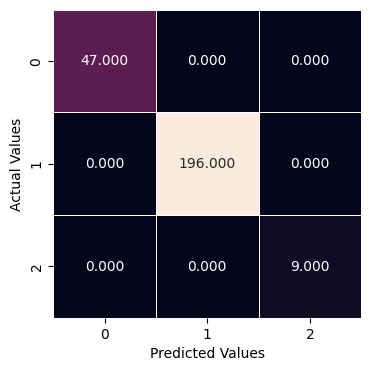

In [ ]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
log_prob_test=lg.predict_proba(x_test)
log_prob_train=lg.predict_proba(x_train)

In [ ]:
# Convert Y_test and log_prob_test to NumPy arrays
Y_test_np = y_test.values
log_prob_test_np = log_prob_test.reshape(-1)

# Ensure Y_test_np is a 1D array if it's multiclass
if Y_test_np.ndim > 1:
    Y_test_np = np.argmax(Y_test_np, axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


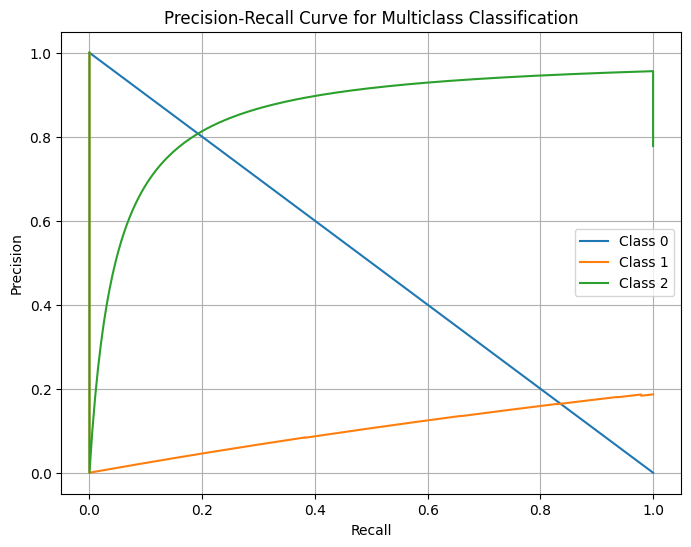

In [ ]:
# Initialize precision and recall dictionaries
precision = {}
recall = {}

# Iterate over unique classes in Y_test_np
for i in range(0,3):
    # Create a binary target for the current class
    target = np.where(Y_test_np == i, 1, 0)

    # Create binary predictions for the current class
    predictions = np.where(log_prob_test_np == i, 1, 0)
    
    # Calculate precision and recall for the current class
    precision[i], recall[i], _ = precision_recall_curve((Y_test_np == i).astype(int), log_prob_test[:,i])

# Plot precision vs recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(0,3):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mapping dictionary for label replacement
label_mapping = {1: 0, 2: 1, 4: 2}

# Replace class labels in y_true using label_mapping
y_true_replaced = np.where(np.isin(Y_test_np, list(label_mapping.keys())), [label_mapping[c] for c in Y_test_np], Y_test_np)

# Print the replaced labels
#print(y_true_replaced)

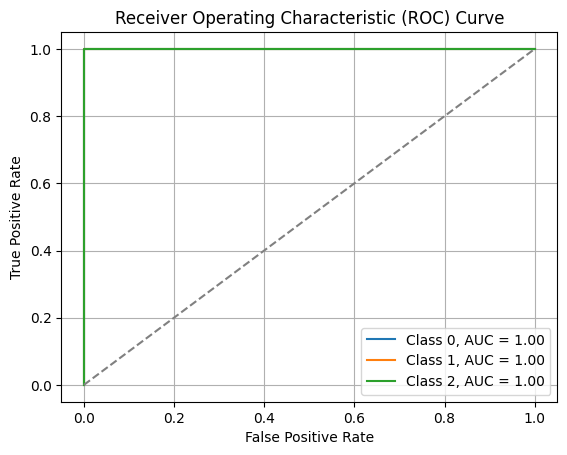

In [ ]:
# Convert true labels to one-hot encoded format
num_classes = len(np.unique(y_true_replaced))
y_true_onehot = np.eye(num_classes)[y_true_replaced]

# Compute false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
auc = dict()
for i in range(3):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_true_onehot[:, i], log_prob_test[:, i])
    auc[i] = roc_auc_score(y_true_onehot[:, i], log_prob_test[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='Class {}, AUC = {:.2f}'.format(i, auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

##  k-Nearest-Neighbors

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, )  
knn.fit(x_train, y_train)

#Predicting the test set result  
y_pred_knn= knn.predict(x_test)

accuracy = accuracy_score(y_test , y_pred_knn)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred_knn))

Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       196
           4       1.00      1.00      1.00         9

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [ ]:
# Validation Scores
scores = cross_val_score(knn, x_test, y_test, cv=5)
print("Cross Validation Scores:", scores)
log_best_score=max(scores)
print("Best Cross Validation Score for Logistic Regression:", log_best_score)

Cross Validation Scores: [0.94117647 1.         1.         1.         0.96      ]
Best Cross Validation Score for Logistic Regression: 1.0


## Fine Tuning k-Nearest Neighbors Model
### GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
print(g_res.best_score_)

# get the hyperparameters with the best score
print(g_res.best_params_)

0.9985964912280701
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(x_train, y_train)

# get a prediction
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       196
           4       1.00      1.00      1.00         9

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



## Randomized Search

In [ ]:
# Define the hyperparameter grid
param_dist = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Perform a randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search object to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', random_search.best_params_)
print('Best accuracy:', random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
Best accuracy: 0.999298245614035


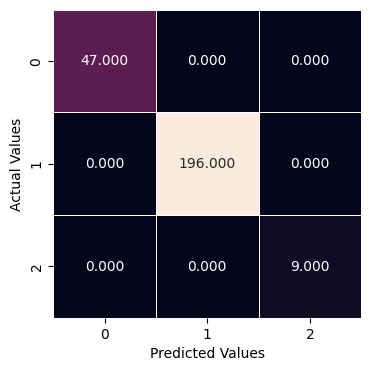

In [ ]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
log_prob_test_knn=knn.predict_proba(x_test)
log_prob_train_knn=knn.predict_proba(x_train)

In [ ]:
# Convert Y_test and log_prob_test to NumPy arrays
Y_test_np_knn = y_test.values
log_prob_test_np_knn = log_prob_test_knn.reshape(-1)

# Ensure Y_test_np is a 1D array if it's multiclass
if Y_test_np.ndim > 1:
    Y_test_np_knn = np.argmax(Y_test_np_knn, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


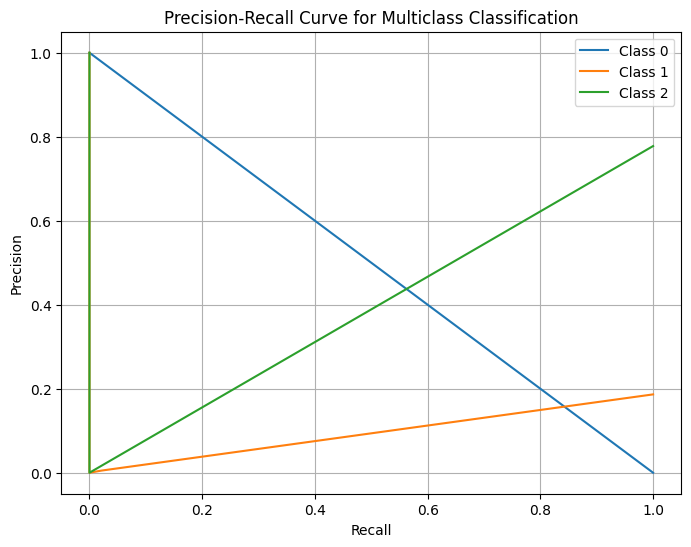

In [ ]:
# Initialize precision and recall dictionaries
precision = {}
recall = {}

# Iterate over unique classes in Y_test_np
for i in range(0,3):
    # Create a binary target for the current class
    target = np.where(Y_test_np == i, 1, 0)

    # Create binary predictions for the current class
    predictions = np.where(log_prob_test_np == i, 1, 0)
    
    # Calculate precision and recall for the current class
    precision[i], recall[i], _ = precision_recall_curve((Y_test_np_knn == i).astype(int), log_prob_test_knn[:,i])

# Plot precision vs recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(0,3):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mapping dictionary for label replacement
label_mapping = {1: 0, 2: 1, 4: 2}

# Replace class labels in y_true using label_mapping
y_true_replaced_knn = np.where(np.isin(Y_test_np_knn, list(label_mapping.keys())), [label_mapping[c] for c in Y_test_np_knn], Y_test_np_knn)

# Print the replaced labels
#print(y_true_replaced)

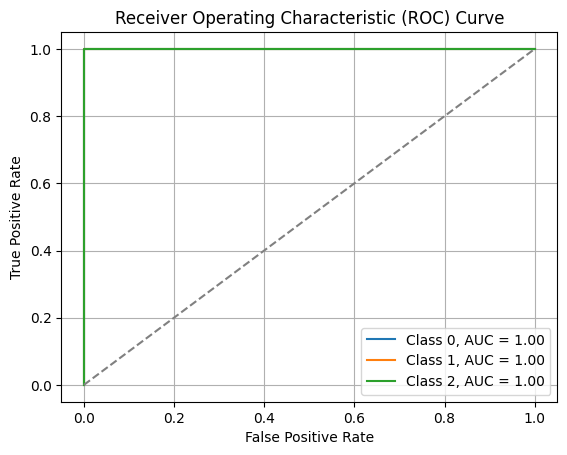

In [ ]:
# Convert true labels to one-hot encoded format
num_classes = len(np.unique(y_true_replaced_knn))
y_true_onehot_knn = np.eye(num_classes)[y_true_replaced_knn]

# Compute false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
auc = dict()
for i in range(3):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_true_onehot_knn[:, i], log_prob_test_knn[:, i])
    auc[i] = roc_auc_score(y_true_onehot_knn[:, i], log_prob_test_knn[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='Class {}, AUC = {:.2f}'.format(i, auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [ ]:
# Train the random forest model
rf_classifier = RandomForestClassifier(criterion= 'entropy', max_depth=44, max_features='sqrt', min_samples_leaf=1, min_samples_split=11, n_estimators= 197)
rf_classifier.fit(x_train, y_train)

# Evaluate the model
y_pred_rf = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test , y_pred_rf)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred_rf))

Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       196
           4       1.00      1.00      1.00         9

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [ ]:
# Validation Scores
scores = cross_val_score(knn, x_test, y_test, cv=5)
print(scores)

[0.94117647 1.         1.         1.         0.96      ]
